# Cyclistic

### Business task:

The company wants to improve their earnings reaching out to their “casual” riders, and for that they have to analyze in what aspects the “casual” and the annual customers differ, to be able to create a focused and successful marketing message to the “casual” customers that makes them change to the annual subscription.


# 1. Download packages

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 2. Import datasets

In [2]:
q2_2019 <- read_csv("/kaggle/input/cyclistic/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("/kaggle/input/cyclistic/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("/kaggle/input/cyclistic/Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("/kaggle/input/cyclistic/Divvy_Trips_2020_Q1.csv")

Rows: 1108163 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
num  (1): 01 - Rental Details Duration In Seconds Uncapped
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1640718 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col

# 3. Wrangle data and combine

In [3]:
# Compare column names each of the file:

colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)
colnames(q1_2020)

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
# Rename columns to make them consistent with q1_2020:

q4_2019 <- rename(q4_2019,
                  ride_id = trip_id,
                  rideable_type = bikeid,
                  started_at = start_time,
                  ended_at = end_time,
                  start_station_name = from_station_name,
                  start_station_id = from_station_id,
                  end_station_name = to_station_name,
                  end_station_id = to_station_id,
                  member_casual = usertype)

q3_2019 <- rename(q3_2019,
                  ride_id = trip_id,
                  rideable_type = bikeid,
                  started_at = start_time,
                  ended_at = end_time,
                  start_station_name = from_station_name,
                  start_station_id = from_station_id,
                  end_station_name = to_station_name,
                  end_station_id = to_station_id,
                  member_casual = usertype)

q2_2019 <- rename(q2_2019,
                  ride_id = "01 - Rental Details Rental ID",
                  rideable_type = "01 - Rental Details Bike ID",
                  started_at = "01 - Rental Details Local Start Time",
                  ended_at = "01 - Rental Details Local End Time",
                  start_station_name = "03 - Rental Start Station Name",
                  start_station_id = "03 - Rental Start Station ID",
                  end_station_name = "02 - Rental End Station Name",
                  end_station_id = "02 - Rental End Station ID",
                  member_casual = "User Type")


In [5]:
# Inspect the data frames and look for inconsistencies:

str(q1_2020)

str(q4_2019)

str(q3_2019)

str(q2_2019)

spc_tbl_ [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...
 $ star

In [6]:
# Convert ride_id and rideable_type to character so that they can stack correctly:

q4_2019 <- mutate(q4_2019,
                  ride_id = as.character(ride_id),
                  rideable_type = as.character(rideable_type))

q3_2019 <- mutate(q3_2019,
                  ride_id = as.character(ride_id),
                  rideable_type = as.character(rideable_type))

q2_2019 <- mutate(q2_2019,
                  ride_id = as.character(ride_id),
                  rideable_type = as.character(rideable_type))

In [7]:
# Stack individual quarter's data frames into one big data frame:

all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

In [8]:
# Remove unnecessary columns:

all_trips <- all_trips %>%
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender, 
            "01 - Rental Details Duration In Seconds Uncapped", 
            "05 - Member Details Member Birthday Year", "Member Gender", "tripduration"))

# 4. Clean data before analysis

In [9]:
# Inspect the new table that has been created:

colnames(all_trips)
nrow(all_trips)
dim(all_trips)
head(all_trips)
str(all_trips)

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 3879822

[1] 3879822       9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber


tibble [3,879,822 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


In [10]:
# Begin by seeing how many observations fall under each usertype:

table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480     857474     378407    2595461 

In [11]:
# Reassign to the desired values:

all_trips <- all_trips %>%
  mutate(member_casual=recode(member_casual, "Subscriber"="member", "Customer"="casual"))

In [12]:
# Check to make sure the proper number of observations were reassigned:

table(all_trips$member_casual)


 casual  member 
 905954 2973868 

In [13]:
# Add columns that list the date, month, day, year of each ride:

all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

In [14]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,month,day,year,day_of_week
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,04,01,2019,Monday
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,04,01,2019,Monday
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,04,01,2019,Monday
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,04,01,2019,Monday
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,04,01,2019,Monday
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,member,2019-04-01,04,01,2019,Monday


In [15]:
# Add a "ride_length" calculation to all trips (in seconds):

all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at)

In [16]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,month,day,year,day_of_week,ride_length
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,04,01,2019,Monday,446 secs
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,04,01,2019,Monday,1048 secs
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,04,01,2019,Monday,252 secs
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,04,01,2019,Monday,357 secs
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,04,01,2019,Monday,1007 secs
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,member,2019-04-01,04,01,2019,Monday,257 secs


In [17]:
# Inspect the structure of the columns:

str(all_trips)

tibble [3,879,822 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "member" "member" "member" "member" ...
 $ date              : Date[1:3879822], format: "2019-04-01"

In [18]:
# Convert "ride_length" from the Factor to numeric so we can run calculations on the data:

is.factor(all_trips$ride_length)

all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

In [19]:
# Remove "bad" data and create new data frame (v2):

all_trips_2 <- all_trips["start_station_name" != "HQ QR"]

all_trips_2 <- all_trips["ride_length" > 0]

# 5. Descriptive analysis

In [20]:
# Descriptive analysis on ride_length (all figures in seconds):

summary(all_trips_2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -3382     411     711    1478    1288 9387024 

In [21]:
# Compare members and casual users:

aggregate(all_trips_2$ride_length ~ all_trips_2$member_casual, FUN = mean)

aggregate(all_trips_2$ride_length ~ all_trips_2$member_casual, FUN = median)

aggregate(all_trips_2$ride_length ~ all_trips_2$member_casual, FUN = max)

all_trips_2$member_casual,all_trips_2$ride_length
<chr>,<dbl>
casual,3537.9516
member,850.0572


all_trips_2$member_casual,all_trips_2$ride_length
<chr>,<dbl>
casual,1540
member,589


all_trips_2$member_casual,all_trips_2$ride_length
<chr>,<dbl>
casual,9387024
member,9056634


In [22]:
# See the average time by each day for members vs casual users:

aggregate(all_trips_2$ride_length ~ all_trips_2$member_casual + all_trips_2$day_of_week, FUN = mean)

all_trips_2$member_casual,all_trips_2$day_of_week,all_trips_2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,3757.6020
member,Friday,824.5305
casual,Monday,3335.0036
member,Monday,842.5726
casual,Saturday,3331.9138
member,Saturday,968.9337
casual,Sunday,3581.2009
member,Sunday,919.8764
casual,Thursday,3659.1917


In [23]:
# Notice that the days of the week are out of order. Let's fix that.

all_trips_2$day_of_week <- ordered(all_trips_2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [24]:
# Let's check:

aggregate(all_trips_2$ride_length ~ all_trips_2$member_casual + all_trips_2$day_of_week, FUN = mean)

all_trips_2$member_casual,all_trips_2$day_of_week,all_trips_2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,3581.2009
member,Sunday,919.8764
casual,Monday,3335.0036
member,Monday,842.5726
casual,Tuesday,3569.5238
member,Tuesday,826.1427
casual,Wednesday,3689.4704
member,Wednesday,823.9980
casual,Thursday,3659.1917


In [25]:
# Analyze ridership data by type and weekday:

all_trips_3 <- all_trips_2 %>%
  mutate(weekday=wday(date, label=TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n(), average_duration=mean(ride_length)) %>%
  arrange(member_casual,weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


In [26]:
View(all_trips_3)

member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,181299,3581.2009
casual,Mon,104452,3335.0036
casual,Tue,91191,3569.5238
casual,Wed,93189,3689.4704
casual,Thu,103347,3659.1917
casual,Fri,122933,3757.6020
casual,Sat,209543,3331.9138
member,Sun,267972,919.8764
member,Mon,472196,842.5726


# 6. Visualization

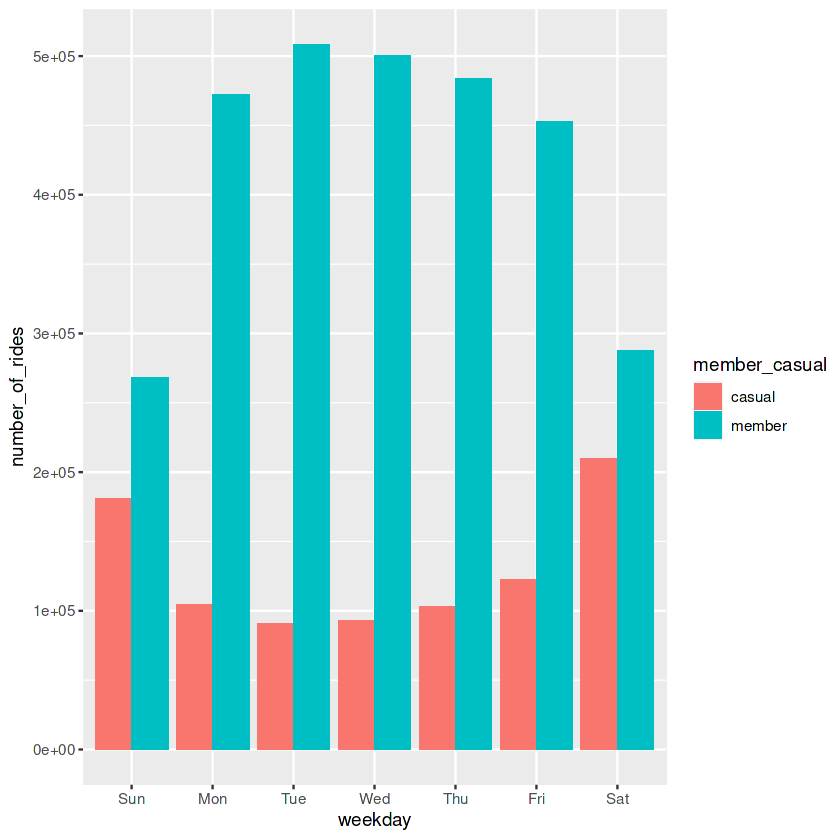

In [27]:
# Let's visualize the number of rides by rider type:

all_trips_3 %>%
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


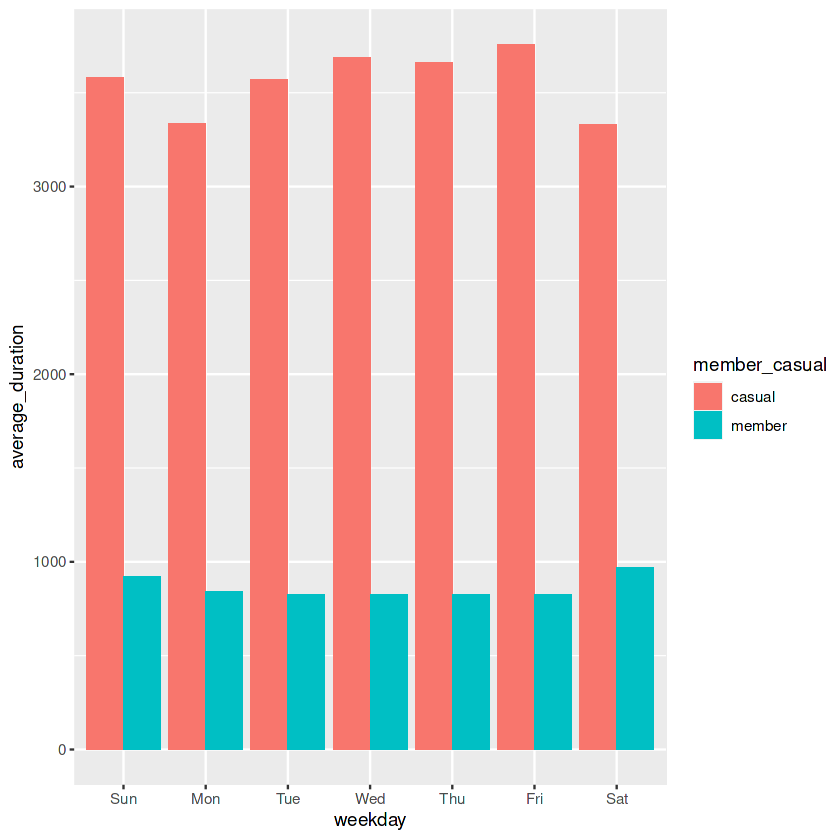

In [28]:
# Let's visualize for average duration:

all_trips_3 %>%
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")
